# Red Wine Quality Regression 

## 1. Problem Statement 

**This project uses machine learning to predict the wine quality rating given the input variables.**

**I would also want to further refine this into a Classification problem to determine which physiochemical properties make a wine 'good'.** 


## 2. Data 

The Data has been downloaded from Kaggle. 

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
    
This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 


## 3. Evaluation


## 4. Features

*Input variables* (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

*Output variable* (based on sensory data):

12 - quality (score between 0 and 10)


### Import the Data 

In [267]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_csv("C:\\Users\\ankur\\new_project\\Projects data\\Wine Quality.csv")
df.shape, df.size

((1599, 12), 19188)

### Let's do some Exploratory data analysis 

In [268]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Text(0.5, 1.0, 'Wine Quality Histogram')

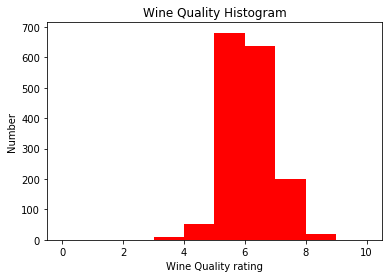

In [269]:
fig, ax = plt.subplots()
ax = plt.hist(df["quality"], bins = [0,1,2,3,4,5,6,7,8,9,10], color = 'red')
plt.xlabel("Wine Quality rating")
plt.ylabel("Number")
plt.title("Wine Quality Histogram")

Text(0.5, 1.0, 'Alcohol content Vs Quality Scatter')

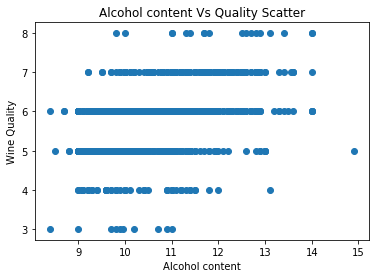

In [270]:
fig, ax = plt.subplots()
ax = plt.scatter( df["alcohol"], df["quality"])
plt.xlabel("Alcohol content")
plt.ylabel("Wine Quality")
plt.title("Alcohol content Vs Quality Scatter")

Text(0.5, 1.0, 'Scatter plot showing Alcohol Vs pH Vs Quality')

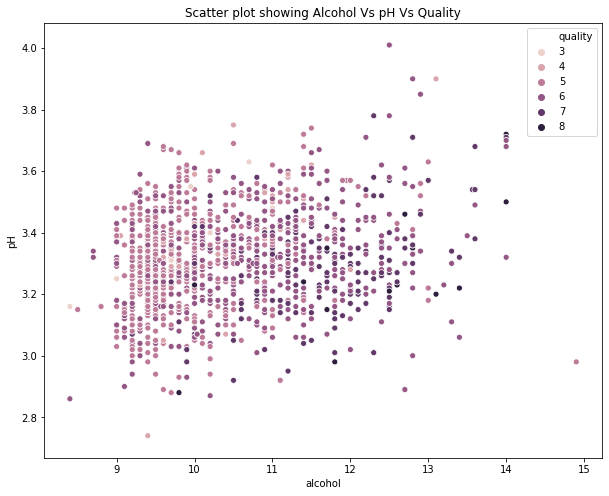

In [271]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(df["alcohol"], df["pH"], hue = df["quality"], legend = "full")
plt.title("Scatter plot showing Alcohol Vs pH Vs Quality")

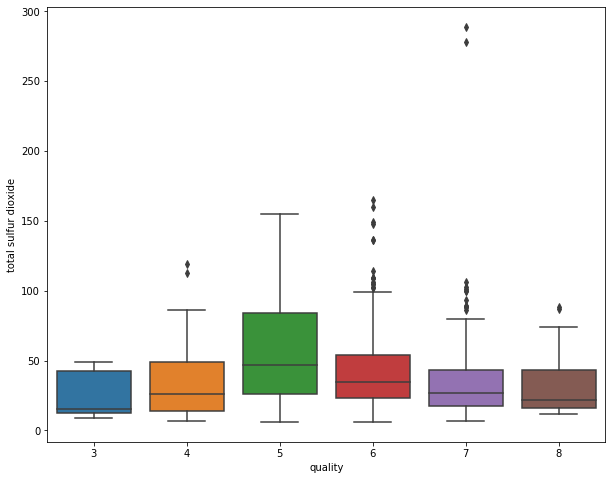

In [272]:
plt.figure(figsize= (10,8))
sns.boxplot("quality", "total sulfur dioxide", data = df)

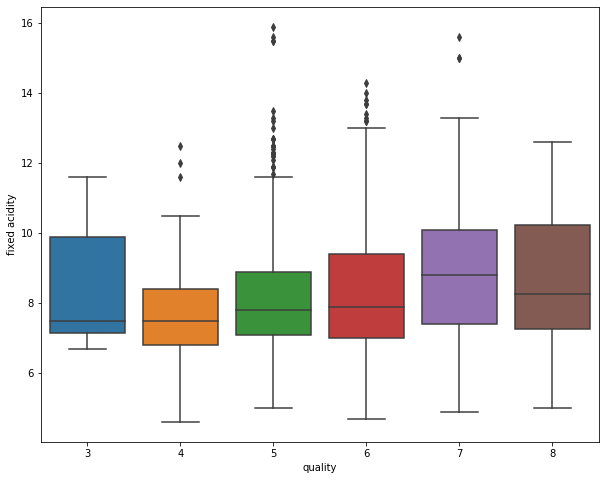

In [273]:
plt.figure(figsize= (10,8))
sns.boxplot("quality", "fixed acidity", data = df)

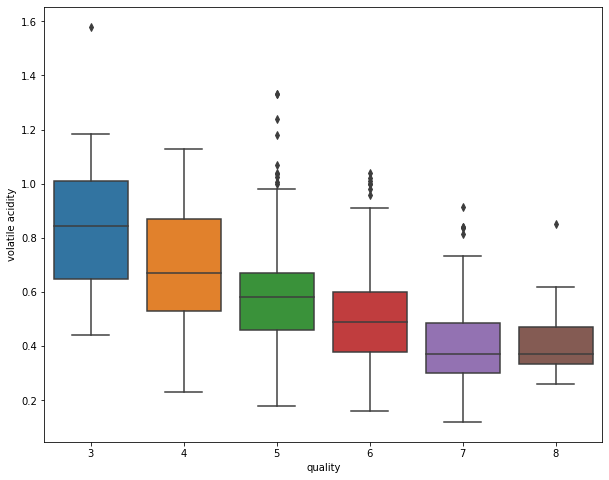

In [274]:
plt.figure(figsize= (10,8))
sns.boxplot("quality", "volatile acidity", data = df)

In [275]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [276]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Plot a Correlation matrix for dataframe

In [277]:
a = df.corr()

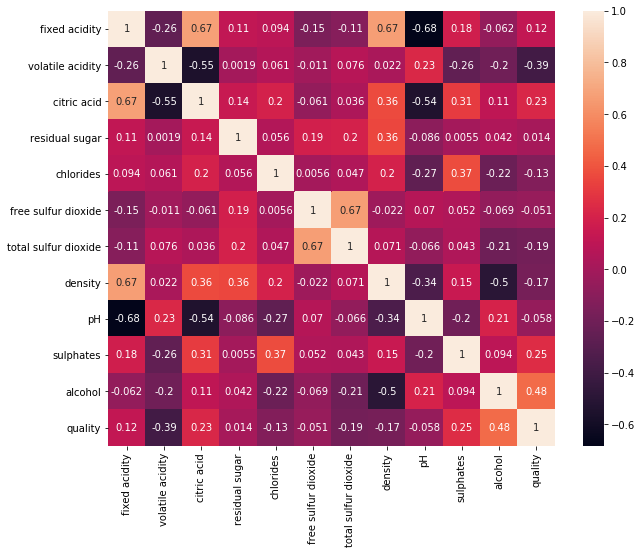

In [278]:
plt.figure(figsize = (10,8))
sns.heatmap(a, annot = True)

## **PART I : REGRESSION**
## 5. Modelling 

### Pre-processing the Data 


In [279]:
# Splitting the data into X(features) and y(labels)

X = df.drop("quality", axis = 1)
y = df["quality"]

# Splitting the data into Training and Test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)
print("X_train shape:", X_train.shape,
      "\nX_test shape: ", X_test.shape, 
      "\ny_train shape:", y_train.shape,
      "\ny_test shape:" , y_test.shape)

X_train shape: (1279, 11) 
X_test shape:  (320, 11) 
y_train shape: (1279,) 
y_test shape: (320,)


In [280]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

#Instantiate the models 

random_state = 42
regressors = [RandomForestRegressor(),
             LinearRegression(),
             DecisionTreeRegressor()]

for regressors in regressors:
    pipe = Pipeline(steps= [("regressors", regressors)])
    pipe.fit(X_train, y_train)
    print(regressors)
    print("model score: %.3f" % pipe.score(X_test, y_test))
    
    

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
model score: 0.527
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model score: 0.403
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, s

## 6. Improving the Model (by tuning Hyperparameters)

We notice that RandomForestRegressor yeilded highest score compared to Linear Regression and DecisionTreeRegressor. 

We can try to further refine and tune the hyperparameters of RandomForestRegressor to improve the score.

For RandomForestRegressor, I will work on finding n_estimators value that gives the best R2 score

In [281]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for n in np.arange(2, 100, 2):
    
    gs = RandomForestRegressor(n_estimators= n, random_state = 42)
    gs.fit(X_train, y_train)
    a = gs.score(X_test, y_test)
    y_preds = gs.predict(X_test)
    mae = mean_absolute_error(y_preds, y_test)
    mse = mean_squared_error(y_preds, y_test)
    print(n , a, mae, mse)
    

2 0.313797277305399 0.4625 0.4484375
4 0.4213900387035072 0.453125 0.378125
6 0.48036681161802586 0.4385416666666667 0.3395833333333333
8 0.49334269788849205 0.437109375 0.331103515625
10 0.5094248270296927 0.4340624999999999 0.32059374999999996
12 0.5177254093257023 0.43046875 0.3151692708333333
14 0.5151982399678442 0.43370535714285713 0.3168207908163265
16 0.5104155770409002 0.431640625 0.3199462890625
18 0.5154340819996314 0.43229166666666663 0.3166666666666667
20 0.5162151257490399 0.4306249999999999 0.31615624999999997
22 0.5210788323221401 0.42954545454545456 0.31297778925619835
24 0.5230469340213957 0.43033854166666663 0.3116916232638889
26 0.5219938685919947 0.429326923076923 0.31237980769230766
28 0.5249572205935229 0.42790178571428567 0.31044323979591837
30 0.5263740077141355 0.4276041666666667 0.3095173611111111
32 0.5292910085327038 0.4263671875 0.307611083984375
34 0.5295495132239354 0.42564338235294114 0.30744214965397926
36 0.5333403807329998 0.42439236111111106 0.30496

In [282]:
# The best R2 score is 53.62 which is achieved at n_estimators = 44

g = RandomForestRegressor(random_state = 42, 
                         n_estimators= 44)
g.fit(X_train, y_train)
g.score(X_test, y_test)

0.5362396305191461

### Let's apply Principal Componenet Analysis to this problem

In [291]:
# Before performing PCA , we need to Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

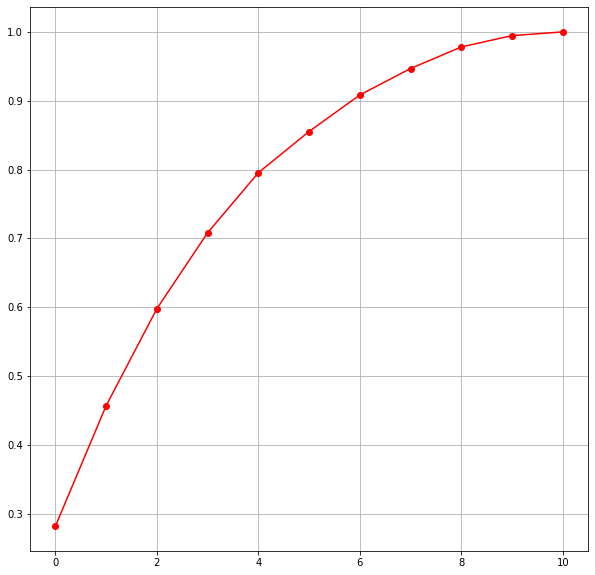

In [319]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_scaled)

plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

### We've observed that 8 components principal components attribute for over 95% of variation in the data. So we will pick first 8 components for our prediction

In [405]:
# n_components has been initialised to 8 
pca6 = PCA(n_components= 5)
pca6.fit_transform(X_scaled)

array([[-1.61952988,  0.45095009, -1.77445415,  0.04374031,  0.06701448],
       [-0.79916993,  1.85655306, -0.91169017,  0.54806597, -0.01839156],
       [-0.74847909,  0.88203886, -1.17139423,  0.41102067, -0.04353101],
       ...,
       [-1.45612897,  0.31174559,  1.12423941,  0.49187676,  0.19371564],
       [-2.27051793,  0.97979111,  0.62796456,  0.63977007,  0.06773549],
       [-0.42697475, -0.53669021,  1.6289552 , -0.39171595,  0.45048209]])

In [406]:
np.cumsum(pca.explained_variance_ratio_)

array([0.28173931, 0.45682201, 0.59778051, 0.70807438, 0.79528275,
       0.85524714, 0.90831906, 0.94676967, 0.97810077, 0.99458561,
       1.        ])

### Split the data into training and test sets and Apply regression models

In [407]:
# Split the data

X_t, X_te, y_t, y_te = train_test_split(X_scaled,y, test_size = 0.2, random_state = 42)

In [415]:
#Applying the models to data which has been transformed through applying PCA

random_state = 42
regressors = [RandomForestRegressor(n_estimators= 38, random_state= 42),
             LinearRegression(),
             DecisionTreeRegressor()]

for regressors in regressors:
    pipe = Pipeline(steps= [("regressors", regressors)])
    pipe.fit(X_t, y_t)
    print(regressors)
    print("model score: %.3f" % pipe.score(X_te, y_te))


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=38, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
model score: 0.536
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
model score: 0.403
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, spli

## Observation
###  ** We do not see any significant improvement in the scores after applying PCA on the data. 

##                                 **PART II** : CLASSIFICATION

In [327]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [427]:
#case = df["quality"] >6
df["Quality2"]=df["quality"]
df2=df.copy()
df2['Quality2'] = df['quality'].apply(lambda x: 'Bad' if x < 6 else 'Good')
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad


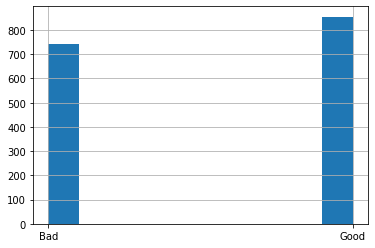

In [428]:
df2["Quality2"].hist()


In [422]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Bad


## Modelling

In [434]:
# Create features dataframe : X_class
X_class = df2.drop(["quality", "Quality2"], axis = 1)
X_class.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [435]:
# Create labels dataframe
y_class = df2["Quality2"]
y_class.head()

0     Bad
1     Bad
2     Bad
3    Good
4     Bad
Name: Quality2, dtype: object

In [447]:
# Create training and test split 

X_class_train,X_class_test, y_class_train,  y_class_test = train_test_split(X_class, y_class, test_size = 0.2, random_state = 42)

X_class_train.shape, X_class_test.shape, y_class_train.shape, y_class_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [455]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [RandomForestClassifier(),
              KNeighborsClassifier(),
              DecisionTreeClassifier()]

for classifiers in classifiers:
    pipe2 = Pipeline(steps = [("classifiers", classifiers)])
    pipe2.fit(X_class_train, y_class_train)
    print(classifiers)
    print("model score: %.3f" % pipe2.score(X_class_test, y_class_test))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model score: 0.769
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
model score: 0.613
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,

## Improving Model Performance 
As seen from above , the RandomForestClassifier gives the best score amongst the models chosen. 

Let's try to further improve the accuracy score from 76.9% 

### 1. Random Forest Classifier

In [503]:
random_state = 42
for n in np.arange(10,100,2):
    rfc = RandomForestClassifier(n_estimators= n, random_state = 42)
    rfc.fit(X_class_train, y_class_train)
    print(n, rfc.score(X_class_test, y_class_test))

10 0.771875
12 0.778125
14 0.78125
16 0.78125
18 0.79375
20 0.7875
22 0.8
24 0.7875
26 0.784375
28 0.79375
30 0.7875
32 0.8
34 0.803125
36 0.790625
38 0.796875
40 0.7875
42 0.784375
44 0.79375
46 0.796875
48 0.790625
50 0.790625
52 0.79375
54 0.790625
56 0.784375
58 0.790625
60 0.790625
62 0.79375
64 0.790625
66 0.78125
68 0.7875
70 0.778125
72 0.784375
74 0.7875
76 0.7875
78 0.7875
80 0.78125
82 0.78125
84 0.784375
86 0.784375
88 0.784375
90 0.784375
92 0.784375
94 0.784375
96 0.790625
98 0.7875


In [504]:
## n_estimators = 34 improves our score from 76.9 to 80.31
rfc = RandomForestClassifier(n_estimators= 34, random_state = 42)
rfc.fit(X_class_train, y_class_train)
rfc.score(X_class_test, y_class_test)

0.803125

In [506]:
from sklearn.metrics import confusion_matrix

y_class_preds = rfc.predict(X_class_test)
conf_matrix = confusion_matrix(y_class_test, y_class_preds)
print(conf_matrix)


[[111  30]
 [ 33 146]]


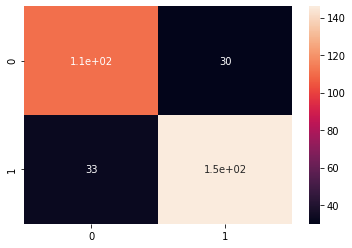

In [508]:
sns.heatmap(conf_matrix, annot = True)

### We were successful to strech the accuracy score from 76.9% to 80.31% 

### Using GridSearchCV to tune hyperparameters 

In [494]:
param = {"n_estimators": np.arange(10,60, 2),
         "max_depth": [None,1,2],
        "max_features" : ["auto", "sqrt"]}

gsv = GridSearchCV(RandomForestClassifier(random_state=42),
                  verbose= True,
                  param_grid= param,
                  n_jobs = -1,
                  cv= 5)
gsv.fit(X_class_train, y_class_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [497]:
gsv.best_params_

{'max_depth': None, 'max_features': 'auto', 'n_estimators': 58}

In [498]:
gsv.best_score_

0.8123927696078432

In [501]:
gsv.scorer_

<function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>